Copyright [2023] [shailendra Bhandari]

   Licensed under the Apache License, Version 2.0 (the "License");
   you may not use this file except in compliance with the License.
   You may obtain a copy of the License at

       http://www.apache.org/licenses/LICENSE-2.0

   Unless required by applicable law or agreed to in writing, software
   distributed under the License is distributed on an "AS IS" BASIS,
   WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
   See the License for the specific language governing permissions and
   limitations under the License.

In [1]:
import QUEVO
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
mutation_prob = 0.05
number_of_runs=50
gates = 3 # 5,10,15,20
chromosomes = 20
generations = 500
gate_types = ['cx', 'x', 'h', 'rxx', 'rzz', 'swap', 'z', 'y', 'toffoli']
target_entanglement = [0.9999999999999996]


In [3]:
#Additional code
import numpy as np
import matplotlib.pyplot as plt

def run_evolution(number_of_runs, mutation_prob):
    
    all_fitness_data = []
    best_fitness_per_gen = []

    for i in range(0, number_of_runs):
        
        init_gen = QUEVO.Generation(chromosomes, gates)
        init_gen.create_initial_generation(gate_types)

        init_gen.run_generation(target_entanglement)

        current_chromosome = init_gen.get_best_chromosome()
        best_chromosome = current_chromosome
        final_fitness = init_gen.get_best_fitness()

        final_fitness_list = [final_fitness]
        best_fitness_list = [final_fitness]

        for gen in range(0, generations):
            init_gen.evolve_into_next_generation(mutation_prob) 
            init_gen.run_generation(target_entanglement) 

            current_fitness = init_gen.get_best_fitness()
            current_chromosome = init_gen.get_best_chromosome()
            print((str(gen + 1)+"\n")+str(current_fitness),end='')

            if final_fitness > abs(current_fitness):
                final_fitness = current_fitness
                best_chromosome = current_chromosome

            final_fitness_list.append(current_fitness)
            best_fitness_list.append(max(best_fitness_list[-1], current_fitness))  # store the best fitness in each generation
            if current_fitness < 0.01:
                break
                
        all_fitness_data.append(final_fitness_list)
        best_fitness_per_gen.append(best_fitness_list)  # store the list of best fitnesses across all runs
        print("Run ", i+1, " completed ")
        
    # calculate mean and standard deviation, and standard error
    mean_fitness = np.mean(all_fitness_data, axis=0)
    std_fitness = np.std(all_fitness_data, axis=0)
    standard_error = std_fitness / np.sqrt(number_of_runs)
    
    # calculate the mean and standard deviation of the best fitness in each generation
    best_fitness_per_gen = np.array(best_fitness_per_gen)
    mean_best_fitness = np.mean(best_fitness_per_gen, axis=0)
    std_best_fitness = np.std(best_fitness_per_gen, axis=0)
    standard_error_best_fitness = std_best_fitness / np.sqrt(number_of_runs)

    # print the mean fitness, standard deviation, and standard error
    print('Mean fitness: ', mean_fitness)
    print('Standard deviation of fitness: ', std_fitness)
    print('Standard error of the mean fitness: ', standard_error)
    print('Mean best fitness: ', mean_best_fitness)
    print('Standard deviation of best fitness: ', std_best_fitness)
    print('Standard error of the mean best fitness: ', standard_error_best_fitness)
    
    return mean_fitness, std_fitness, standard_error, mean_best_fitness, std_best_fitness, standard_error_best_fitness

# call the function and save the data to a file
file_name = 'Mutation_0.05_3gates5Q.txt'
mean_fitness, std_fitness, standard_error, mean_best_fitness, std_best_fitness, standard_error_best_fitness = run_evolution(number_of_runs=50, mutation_prob=0.05)
np.savetxt(file_name, np.column_stack((mean_fitness, std_fitness, standard_error, mean_best_fitness, std_best_fitness, standard_error_best_fitness)), header="Mean fitness, Standard deviation of fitness, Standard error of the mean fitness, Mean best fitness, Standard deviation of best fitness, Standard error of the mean best fitness", fmt='%1.4f', delimiter=',')

1
0.19999999999999952
0.099999999999999643
0.099999999999999644
0.099999999999999645
0.099999999999999646
0.099999999999999647
0.099999999999999648
0.099999999999999649
0.0999999999999996410
0.0999999999999996411
0.0999999999999996412
0.0999999999999996413
0.1699743022401308814
0.1699743022401308815
0.199999999999999516
0.0999999999999996417
0.0999999999999996418
0.999999999999999419
0.999999999999999420
0.2632381556636419521
0.999999999999999422
0.999999999999999623
0.999999999999999424
0.999999999999999425
0.999999999999999426
0.999999999999999427
0.999999999999999428
0.999999999999999429
0.999999999999999430
0.999999999999999431
0.1999999999999996232
0.999999999999999433
0.999999999999999634
0.999999999999999435
0.1999999999999996236
0.999999999999999437
0.4999999999999996738
0.999999999999999439
0.4999999999999996740
0.1999999999999996241
0.999999999999999442
0.999999999999999443
0.999999999999999444
0.999999999999999445
0.999999999999999446
0.199999999999999547
0.99999999999999944

0.1999999999999995377
0.19983415008110583378
0.17027604366896432379
0.1819850091992915380
0.19787675516650993381
0.10413940956918843382
0.1145119666941028383
0.1891269889419237384
0.1145119666941028385
0.15164309222044048386
0.1974699809471352387
0.10211973707983224388
0.1145119666941028389
0.1430522932512983390
0.10960078911847604391
0.1974699809471352392
0.1974699809471352393
0.1145119666941028394
0.1543146557732492395
0.1145119666941028396
0.1145119666941028397
0.1145119666941028398
0.1145119666941028399
0.1430522932512983400
0.106118427169128401
0.1145119666941028402
0.1181183673124323403
0.11438812651857433404
0.13260105071900774405
0.1145119666941028406
0.13260105071900774407
0.13260105071900774408
0.13260105071900774409
0.13260105071900774410
0.13260105071900774411
0.1271647579541283412
0.1145119666941028413
0.13260105071900774414
0.1145119666941028415
0.10942020613684977416
0.09503067043782498417
0.1715127454079186418
0.1715127454079186419
0.16360125727907815420
0.1636012572790

0.1999999999999995253
0.1999999999999995254
0.1999999999999995255
0.1999999999999995256
0.1999999999999995257
0.1999999999999995258
0.1999999999999995259
0.1999999999999995260
0.1999999999999995261
0.19999999999999962262
0.1999999999999995263
0.1999999999999995264
0.1999999999999995265
0.1999999999999995266
0.1999999999999995267
0.49999999999999967268
0.1999999999999995269
0.49999999999999956270
0.1999999999999995271
0.1999999999999995272
0.1999999999999995273
0.1999999999999995274
0.1999999999999995275
0.1999999999999995276
0.1999999999999995277
0.1999999999999995278
0.1999999999999995279
0.1999999999999995280
0.1999999999999995281
0.1999999999999995282
0.1999999999999995283
0.9999999999999994284
0.1999999999999995285
0.1999999999999995286
0.1999999999999995287
0.1999999999999995288
0.1999999999999995289
0.1999999999999995290
0.1999999999999995291
0.1999999999999995292
0.9999999999999994293
0.1999999999999995294
0.1999999999999995295
0.1999999999999995296
0.1999999999999995297
0.19999

0.9999999999999994130
0.9999999999999994131
0.9999999999999994132
0.9999999999999996133
0.49999999999999967134
0.9999999999999994135
0.9999999999999994136
0.9999999999999994137
0.9999999999999994138
0.9999999999999994139
0.9999999999999994140
0.49999999999999967141
0.9999999999999994142
0.9999999999999994143
0.9999999999999994144
0.9999999999999996145
0.9999999999999994146
0.9999999999999994147
0.9999999999999994148
0.19999999999999962149
0.1999999999999995150
0.19999999999999962151
0.1999999999999995152
0.49999999999999967153
0.9999999999999994154
0.9999999999999996155
0.9999999999999994156
0.9999999999999994157
0.1753622002395342158
0.1999999999999995159
0.49999999999999967160
0.9999999999999996161
0.9999999999999994162
0.19999999999999962163
0.1999999999999995164
0.9999999999999996165
0.9999999999999994166
0.9999999999999994167
0.9999999999999994168
0.9999999999999994169
0.9999999999999994170
0.9999999999999994171
0.9999999999999994172
0.1999999999999995173
0.49999999999999967174
0.

1
0.19999999999999952
0.19999999999999953
0.9434020743976214
0.99999999999999945
0.99999999999999946
0.19999999999999957
0.19999999999999958
0.19999999999999959
0.94340207439762110
0.999999999999999411
0.999999999999999412
0.999999999999999413
0.999999999999999414
0.999999999999999415
0.999999999999999416
0.999999999999999417
0.999999999999999418
0.1999999999999996219
0.1999999999999996220
0.999999999999999621
0.999999999999999622
0.999999999999999423
0.999999999999999624
0.999999999999999425
0.999999999999999626
0.999999999999999427
0.999999999999999428
0.999999999999999429
0.999999999999999430
0.999999999999999431
0.999999999999999432
0.4999999999999996733
0.448286621783806234
0.4999999999999995635
0.999999999999999436
0.999999999999999437
0.999999999999999438
0.999999999999999639
0.1999999999999996240
0.4999999999999996741
0.999999999999999442
0.999999999999999443
0.999999999999999644
0.999999999999999445
0.199999999999999546
0.999999999999999447
0.999999999999999448
0.9999999999999

0.2249657153149036378
0.1999999999999995379
0.1999999999999995380
0.9718508169756539381
0.9718508169756539382
0.1999999999999995383
0.9718508169756539384
0.9718508169756539385
0.9718508169756539386
0.9718508169756539387
0.9718508169756539388
0.9718508169756539389
0.9718508169756539390
0.9718508169756539391
0.9718508169756539392
0.9718508169756539393
0.9718508169756539394
0.9718508169756539395
0.9718508169756539396
0.9718508169756539397
0.9718508169756539398
0.9718508169756539399
0.971842380193551400
0.971842380193551401
0.1999999999999995402
0.971842380193551403
0.971842380193551404
0.971842380193551405
0.971842380193551406
0.971842380193551407
0.971842380193551408
0.971842380193551409
0.971842380193551410
0.971842380193551411
0.971842380193551412
0.49999999999999967413
0.971842380193551414
0.971842380193551415
0.971842380193551416
0.1999999999999995417
0.971842380193551418
0.971842380193551419
0.971842380193551420
0.971842380193551421
0.1999999999999995422
0.971842380193551423
0.97184

0.9999999999999994256
0.9999999999999994257
0.9999999999999994258
0.9999999999999994259
0.9999999999999996260
0.9999999999999994261
0.9999999999999994262
0.1999999999999995263
0.9999999999999994264
0.8254117212332305265
0.9999999999999994266
0.9999999999999994267
0.9999999999999996268
0.49999999999999956269
0.9999999999999994270
0.9999999999999994271
0.9999999999999994272
0.9999999999999994273
0.1999999999999995274
0.9999999999999994275
1.0276
0.9999999999999994277
0.9999999999999994278
0.9999999999999994279
0.9999999999999994280
0.8358486232191825281
0.9999999999999996282
0.9999999999999996283
0.9999999999999994284
0.9999999999999994285
0.4653970596438288286
0.9999999999999994287
0.9999999999999996288
0.9999999999999994289
0.9999999999999994290
0.9999999999999996291
0.9999999999999996292
0.9999999999999994293
0.9999999999999994294
0.1999999999999995295
0.9999999999999994296
0.9999999999999996297
0.9999999999999994298
0.9999999999999996299
0.9999999999999996300
0.9999999999999994301
0.

0.1960980894506955132
0.9804904472534793133
0.9311448558124686134
0.1999999999999995135
0.9804904472534796136
0.1999999999999995137
0.9804904472534793138
0.19999999999999962139
0.9804904472534793140
0.9438040253808562141
0.1999999999999995142
0.9579226111152447143
0.9561467284010229144
0.1999999999999995145
0.9363097192160019146
0.9804904472534793147
0.9804904472534796148
0.9428132760159673149
0.9804904472534793150
0.9804904472534793151
0.9804904472534792152
0.9292622244528681153
0.9804904472534793154
0.9320225353076816155
0.9804904472534793156
0.19999999999999962157
0.9804904472534793158
0.4645761991007493159
0.9804904472534793160
0.9804904472534796161
0.49219617890139156162
0.1999999999999995163
0.9804904472534793164
0.4999999999999998165
0.1999999999999995166
0.19999999999999962167
0.931717891239833168
0.9655847367677836169
0.9804904472534796170
0.1999999999999995171
0.9804904472534793172
0.19999999999999962173
0.49219617890139156174
0.9804904472534793175
0.9804904472534796176
0.980

0.19999999999999962371
0.19999999999999962372
0.19999999999999962373
0.19999999999999962374
0.1999999999999995375
0.19999999999999962376
0.19999999999999962377
0.19999999999999962378
0.19999999999999962379
0.19727368753426344380
0.19999999999999962381
0.19999999999999962382
0.19999999999999962383
0.1999999999999995384
0.19999999999999962385
0.19999999999999962386
0.19999999999999962387
0.19999999999999962388
0.19999999999999962389
0.19999999999999962390
0.1999999999999995391
0.19999999999999962392
0.1999999999999995393
0.19999999999999962394
0.19999999999999962395
0.19999999999999962396
0.19999999999999962397
0.19999999999999962398
0.19999999999999962399
0.1999999999999995400
0.19999999999999962401
0.19999999999999962402
0.1999999999999995403
0.19999999999999962404
0.19999999999999962405
0.19999999999999962406
0.19999999999999962407
0.19999999999999962408
0.19999999999999962409
0.19999999999999962410
0.19999999999999962411
0.1999999999999995412
0.1999999999999995413
0.19999999999999962

0.1999999999999995242
0.9999999999999996243
0.9999999999999996244
0.9999999999999996245
0.1999999999999995246
0.9999999999999996247
0.49999999999999967248
0.9999999999999996249
0.9999999999999996250
0.9999999999999996251
0.9999999999999996252
0.1999999999999995253
0.9999999999999996254
0.9999999999999996255
0.1999999999999995256
0.9999999999999996257
0.9999999999999996258
0.9999999999999996259
0.49999999999999967260
0.1999999999999995261
0.1999999999999995262
0.9999999999999996263
0.19951396499070473264
0.1999999999999995265
0.9999999999999996266
0.9999999999999996267
0.9999999999999996268
0.9999999999999996269
0.9999999999999996270
0.9999999999999996271
0.9999999999999996272
0.9999999999999996273
0.9999999999999996274
0.9999999999999996275
0.9999999999999996276
0.9999999999999996277
0.9999999999999996278
0.9999999999999996279
0.9999999999999996280
0.9986993549191752281
0.9999999999999996282
0.9999999999999996283
0.9999999999999996284
0.9999999999999996285
0.9999999999999996286
0.99999

0.9999999999999994117
0.49999999999999967118
0.9999999999999994119
0.9999999999999994120
0.9999999999999994121
0.9999999999999994122
0.9999999999999994123
0.9999999999999996124
0.1999999999999995125
0.9999999999999994126
0.9999999999999994127
0.9999999999999994128
0.9999999999999994129
0.9999999999999994130
0.9999999999999994131
0.9999999999999996132
0.9999999999999996133
0.9999999999999994134
0.9999999999999994135
0.9999999999999994136
0.9999999999999994137
0.1999999999999995138
0.9999999999999994139
0.9999999999999994140
0.9999999999999996141
0.9999999999999994142
0.9999999999999994143
0.9999999999999994144
0.9999999999999994145
0.9999999999999994146
0.19999999999999962147
0.9999999999999994148
0.9999999999999996149
0.9999999999999994150
0.9999999999999994151
0.9999999999999996152
0.9999999999999994153
0.9999999999999994154
0.49999999999999967155
0.9999999999999994156
0.1999999999999995157
0.1999999999999995158
0.9999999999999994159
0.9999999999999994160
0.19999999999999962161
0.9999

0.1999999999999995489
0.9999999999999994490
0.1999999999999995491
0.9999999999999994492
0.1999999999999995493
0.9999999999999994494
0.9999999999999996495
0.9999999999999994496
0.9999999999999996497
0.9999999999999994498
0.9999999999999994499
0.9999999999999996500
0.9999999999999994Run  9  completed 
1
0.19999999999999952
0.19999999999999953
0.19999999999999954
0.235062834231695165
0.19999999999999956
0.99999999999999947
0.99999999999999948
0.499999999999999679
0.999999999999999410
0.999999999999999411
0.999999999999999612
0.999999999999999413
0.999999999999999414
0.199999999999999515
0.999999999999999416
0.999999999999999417
0.199999999999999518
0.999999999999999419
0.999999999999999420
0.999999999999999421
0.999999999999999622
0.499999999999999823
0.999999999999999624
0.999999999999999425
0.999999999999999426
0.999999999999999427
0.999999999999999428
0.999999999999999429
0.999999999999999430
0.999999999999999631
0.999999999999999432
0.999999999999999633
0.999999999999999434
0.99999999

0.9999999999999994365
0.9999999999999994366
0.1999999999999995367
0.9999999999999996368
0.553298447835734369
0.553298447835734370
0.1999999999999995371
0.9999999999999996372
0.1999999999999995373
0.9999999999999994374
0.9999999999999994375
0.9999999999999994376
0.9999999999999994377
0.9999999999999996378
0.9999999999999994379
0.9999999999999994380
0.9999999999999994381
0.9999999999999996382
0.1999999999999995383
0.19999999999999962384
0.9999999999999994385
0.9999999999999994386
0.9999999999999994387
0.9999999999999994388
0.9999999999999994389
0.9999999999999994390
0.9999999999999994391
0.9999999999999994392
0.9999999999999994393
0.9999999999999996394
0.9999999999999994395
0.19999999999999962396
0.9999999999999994397
0.1999999999999995398
0.1999999999999995399
0.9999999999999994400
0.9999999999999994401
0.1999999999999995402
0.9999999999999994403
0.4999999999999998404
0.9999999999999994405
0.9999999999999994406
0.1999999999999995407
0.9999999999999994408
0.9999999999999994409
0.99999999

0.9999999999999994116
0.9999999999999994117
0.9999999999999994118
0.35018234371209844119
0.9999999999999994120
0.9999999999999996121
0.9999999999999994122
0.1999999999999995123
0.9999999999999994124
0.19999999999999962125
0.9999999999999994126
0.9925625000761188127
0.19999999999999962128
0.9999999999999994129
0.9999999999999994130
0.9999999999999994131
0.9999999999999994132
0.9999999999999996133
0.49999999999999967134
0.9999999999999994135
0.9999999999999994136
0.9999999999999994137
0.9999999999999994138
0.9999999999999996139
0.1999999999999995140
0.1999999999999995141
0.9999999999999994142
0.9999999999999994143
0.9999999999999994144
0.9999999999999994145
0.4999999999999998146
0.9999999999999994147
0.9999999999999996148
0.1999999999999995149
0.9999999999999994150
0.9999999999999994151
0.9999999999999994152
0.9999999999999994153
0.9999999999999994154
0.9999999999999994155
0.9999999999999994156
0.4999999999999998157
0.9999999999999994158
0.9999999999999994159
0.9999999999999994160
0.9999

0.1999999999999995364
0.9832576543727827365
0.9984785657934061366
0.98628366818832367
0.9980982072417575368
0.9902629714880429369
0.9828529810694767370
0.49999999999999956371
0.9847359773198263372
0.9980982072417577373
0.1999999999999995374
0.9979698507549224375
0.2174183750210401376
0.9984785657934061377
0.9810601907723654378
0.1999999999999995379
0.9980982072417578380
0.9980982072417575381
0.9882643493731196382
0.9980982072417575383
0.49923928289670283384
0.9929875217392513385
0.9980982072417575386
0.9980982072417575387
0.1999999999999995388
0.1999999999999995389
0.9980982072417575390
0.9877404937671437391
0.9999999999999996392
0.9810525829559601393
0.9941489628371222394
0.9980982072417575395
0.9824539730319234396
0.19999999999999962397
0.9980982072417575398
0.9980982072417577399
0.9980982072417575400
0.9850906553646085401
0.1999999999999995402
0.9810635367814668403
0.1999999999999995404
0.48333144124318705405
0.2174183750210401406
0.9814927691313811407
0.1999999999999995408
0.998098

0.9999999999999994113
0.9999999999999994114
0.1999999999999995115
0.9999999999999994116
0.9999999999999994117
0.9999999999999994118
0.1999999999999995119
0.9999999999999994120
0.9999999999999994121
0.9999999999999994122
0.1999999999999995123
0.9999999999999994124
0.9999999999999994125
0.9999999999999994126
0.9999999999999994127
0.9999999999999994128
0.9999999999999994129
0.1999999999999995130
0.9999999999999994131
0.9999999999999994132
0.9999999999999994133
0.9999999999999994134
0.1999999999999995135
0.9999999999999994136
0.9999999999999994137
0.9999999999999994138
0.9999999999999994139
0.9999999999999994140
0.9999999999999994141
0.9999999999999994142
0.9999999999999994143
0.9999999999999994144
0.9999999999999994145
0.9999999999999994146
0.9999999999999994147
0.9999999999999994148
0.9999999999999994149
0.9999999999999994150
0.9999999999999994151
0.1999999999999995152
0.1999999999999995153
0.9999999999999994154
0.9999999999999994155
0.1999999999999995156
0.9999999999999994157
0.99999999

0.19999999999999962358
0.1999999999999995359
0.1999999999999995360
0.19999999999999962361
0.1999999999999995362
0.1999999999999995363
0.1999999999999995364
0.1999999999999995365
0.1999999999999995366
0.1999999999999995367
0.1999999999999995368
0.19999999999999962369
0.1999999999999995370
0.1999999999999995371
0.1999999999999995372
0.1999999999999995373
0.1999999999999995374
0.1999999999999995375
0.1999999999999995376
0.1999999999999995377
0.1999999999999995378
0.1999999999999995379
0.1999999999999995380
0.1999999999999995381
0.958279528397605382
0.1999999999999995383
0.1999999999999995384
0.1999556395179406385
0.1999999999999995386
0.1999999999999995387
0.1999999999999995388
0.1999999999999995389
0.1999999999999995390
0.1999999999999995391
0.1999999999999995392
0.1999999999999995393
0.1999999999999995394
0.1999999999999995395
0.1999999999999995396
0.1999999999999995397
0.1999999999999995398
0.1999999999999995399
0.1999999999999995400
0.1999999999999995401
0.958279528397605402
0.9666236

0.9999999999999998234
0.9999999999999996235
0.9999999999999998236
0.9999999999999998237
0.9999999999999998238
0.9999999999999998239
0.9999999999999998240
0.9999999999999998241
0.9999999999999998242
0.9999999999999998243
0.9999999999999998244
0.9999999999999998245
0.9999999999999996246
0.1999999999999995247
0.9999999999999998248
0.9999999999999998249
0.9999999999999998250
0.9999999999999998251
0.9999999999999998252
0.9999999999999998253
0.9999999999999998254
0.9999999999999998255
0.19999999999999962256
0.1999999999999995257
0.9999999999999998258
0.9999999999999998259
0.9999999999999998260
0.9999999999999998261
0.9999999999999996262
0.9999999999999998263
0.9999999999999998264
0.9999999999999998265
0.9999999999999998266
0.9999999999999998267
0.9999999999999998268
0.19999999999999962269
0.1966599539714572270
0.9999999999999998271
0.9259314884082783272
0.19999999999999962273
0.9999999999999998274
0.9999999999999998275
0.9999999999999998276
0.19999999999999962277
0.9999999999999996278
0.9999

0.9999999999999996110
0.9999999999999996111
0.9999999999999996112
0.9999999999999996113
0.9999999999999996114
0.1999999999999995115
0.9999999999999996116
0.9999999999999996117
0.9999999999999996118
0.9999999999999996119
0.1999999999999995120
0.9999999999999996121
0.9999999999999996122
0.9999999999999996123
0.9999999999999996124
0.9999999999999996125
0.9999999999999996126
0.1999999999999995127
0.9999999999999996128
0.9999999999999996129
0.9999999999999996130
0.9999999999999996131
0.9999999999999996132
0.9999999999999996133
0.9999999999999996134
0.49999999999999967135
0.9999999999999996136
0.9999999999999996137
0.9999999999999996138
0.9999999999999996139
0.9999999999999996140
0.1999999999999995141
0.9999999999999996142
0.9999999999999996143
0.9999999999999996144
0.9999999999999996145
0.1999999999999995146
0.9999999999999996147
0.1999999999999995148
0.9999999999999996149
0.9999999999999996150
0.9999999999999996151
0.9999999999999996152
0.49999999999999967153
0.1999999999999995154
0.999999

0.9999999999999994355
0.9999999999999994356
0.1999999999999995357
0.1999999999999995358
0.9999999999999994359
0.1999999999999995360
0.9999999999999994361
0.9999999999999994362
0.9999999999999994363
0.9999999999999996364
0.9999999999999996365
0.9999999999999996366
0.9999999999999994367
0.9999999999999994368
0.9999999999999996369
0.9999999999999996370
0.9999999999999996371
0.19999999999999962372
0.9999999999999994373
0.49999999999999967374
0.1999999999999995375
0.9999999999999994376
0.9999999999999994377
0.9999999999999996378
0.9999999999999994379
0.9999999999999996380
0.9999999999999996381
0.19999999999999962382
0.9999999999999994383
0.19999999999999962384
0.9999999999999998385
0.4999999999999998386
0.9999999999999994387
0.9999999999999996388
0.9999999999999996389
0.9999999999999994390
0.9999999999999996391
0.9999999999999994392
0.9999999999999994393
0.9999999999999996394
0.19999999999999962395
0.1999999999999995396
0.9999999999999994397
0.9999999999999994398
0.9999999999999994399
0.999

0.9999999999999994230
0.9999999999999994231
0.9999999999999996232
0.9999999999999994233
0.9999999999999996234
0.9999999999999996235
0.1999999999999995236
0.9999999999999994237
0.1999999999999995238
0.9999999999999996239
0.1999999999999995240
0.9999999999999994241
0.1999999999999995242
0.19999999999999962243
0.49999999999999967244
0.1999999999999995245
0.9999999999999994246
0.9999999999999996247
0.9999999999999994248
0.1999999999999995249
0.9999999999999996250
0.9999999999999994251
0.9999999999999996252
0.9999999999999994253
0.9999999999999994254
0.9999999999999996255
0.9999999999999996256
0.9999999999999994257
0.9999999999999994258
0.9999999999999994259
0.9999999999999994260
0.9999999999999994261
0.9999999999999994262
0.9999999999999994263
0.456740883021328264
0.9999999999999996265
0.9999999999999996266
0.1999999999999995267
0.9999999999999994268
0.19999999999999962269
0.1999999999999995270
0.1999999999999995271
0.1999999999999995272
0.9999999999999994273
0.9999999999999994274
0.199999

0.9999854660610555477
0.43611282684396535478
0.9999854660610555479
0.9999854660610555480
0.9999722154018451481
0.9999653552507185482
0.9999854660610555483
0.9999698562064372484
0.9999854660610555485
0.20003215582316836486
0.4999927330305277487
0.9999854660610555488
0.9999999999999994489
0.999968450067821490
0.20003215582316836491
0.9999854660610555492
0.9999739761233313493
0.99996724705503494
0.9999854660610555495
0.29514210733337576496
0.9999649118857012497
0.9999854660610555498
0.9999684539321219499
0.9999854660610555500
0.9999854660610555Run  21  completed 
1
0.099999999999999642
0.99966318589802353
0.19999999999999954
0.19999999999999955
0.19999999999999956
0.19999999999999957
0.99966318589802358
0.19999999999999959
0.999663185898023510
0.199999999999999511
0.199999999999999512
0.4999999999999996713
0.199999999999999514
0.999999999999999615
0.1999999999999996216
0.999999999999999417
0.999999999999999418
0.999999999999999419
0.199999999999999520
0.999999999999999421
0.99999999999999

0.1999999999999995225
0.1999999999999995226
0.1999999999999995227
0.19999999999999962228
0.1999999999999995229
0.19999999999999962230
0.9729969728286215231
0.1999999999999995232
0.1999999999999995233
0.1999999999999995234
0.1999999999999995235
0.1999999999999995236
0.19999999999999962237
0.1999999999999995238
0.1999999999999995239
0.1999999999999995240
0.1999999999999995241
0.1999999999999995242
0.1999999999999995243
0.1999999999999995244
0.1999999999999995245
0.1999999999999995246
0.1999999999999995247
0.1999999999999995248
0.1999999999999995249
0.1999999999999995250
0.19999999999999962251
0.1999999999999995252
0.19999999999999962253
0.9729969728286215254
0.1999999999999995255
0.1999999999999995256
0.19999999999999962257
0.1999999999999995258
0.1999999999999995259
0.1999999999999995260
0.1999999999999995261
0.1999999999999995262
0.1999999999999995263
0.1999999999999995264
0.1999999999999995265
0.1999999999999995266
0.19999999999999962267
0.1999999999999995268
0.1999999999999995269
0.1

0.9999999999999996100
0.1999999999999995101
0.9999999999999996102
0.9999999999999996103
0.9999999999999996104
0.9999999999999996105
0.9999999999999996106
0.9999999999999996107
0.1999999999999995108
0.1999999999999995109
0.9999999999999996110
0.9999999999999996111
0.9999999999999996112
0.9999999999999996113
0.9999999999999996114
0.9999999999999996115
0.9999999999999996116
0.9999999999999996117
0.9999999999999996118
0.1999999999999995119
0.49999999999999967120
0.9999999999999996121
0.1999999999999995122
0.9999999999999996123
0.1999999999999995124
0.9999999999999996125
0.9999999999999996126
0.9999999999999996127
0.9999999999999996128
0.9999999999999996129
0.9999999999999996130
0.1999999999999995131
0.9999999999999996132
0.9999999999999996133
0.9999999999999996134
0.9999999999999996135
0.9999999999999996136
0.9999999999999998137
0.19999999999999962138
0.9999999999999998139
0.9999999999999998140
0.9999999999999998141
0.9999999999999998142
0.9999999999999998143
0.9999999999999998144
0.199999

0.9999999999999998472
0.9999999999999998473
0.1999999999999995474
0.9999999999999998475
0.9999999999999998476
0.9999999999999998477
0.9999999999999998478
0.19999999999999962479
0.19999999999999962480
0.9999999999999998481
0.19999999999999962482
0.9999999999999998483
0.9999999999999998484
0.1999999999999995485
0.9999999999999998486
0.9999999999999996487
0.9999999999999998488
0.9999999999999998489
0.1999999999999995490
0.19999999999999962491
0.9999999999999998492
0.1999999999999995493
0.9999999999999998494
0.9999999999999998495
0.19999999999999962496
0.9999999999999998497
0.9999999999999998498
0.9999999999999996499
0.9999999999999998500
0.9999999999999998Run  24  completed 
1
0.499999999999999672
0.19999999999999953
0.99999999999999944
0.99999999999999945
0.99999999999999946
0.49999999999999987
0.99999999999999948
0.99999999999999969
0.999999999999999410
0.999999999999999411
0.999999999999999412
0.999999999999999413
0.999999999999999414
0.199999999999999515
0.199999999999999516
0.9999999

0.9999999999999998220
0.9999999999999998221
0.49999999999999967222
0.19999999999999962223
0.9999999999999998224
0.9999999999999998225
0.19999999999999962226
0.9999999999999998227
0.1999999999999995228
0.9999999999999996229
0.9999999999999998230
0.9999999999999998231
0.1999999999999995232
0.49999999999999967233
0.9999999999999998234
0.19999999999999962235
0.6438139290518172236
0.9999999999999998237
0.9999999999999998238
0.49999999999999967239
0.1999999999999995240
0.9999999999999998241
0.1999999999999995242
0.1999999999999995243
0.19999999999999962244
0.9999999999999998245
0.9999999999999996246
0.9999999999999998247
0.9999999999999998248
0.9999999999999998249
0.9999999999999998250
0.9999999999999998251
0.9999999999999998252
0.19621726493564418253
0.1999999999999995254
0.49999999999999967255
0.9999999999999998256
0.9999999999999998257
0.9999999999999998258
0.9999999999999998259
0.1999999999999995260
0.19999999999999962261
0.9999999999999998262
0.9503009047266742263
0.9999999999999998264


0.9999999999999994466
0.9999999999999994467
0.1999999999999995468
0.9999999999999994469
0.9999999999999994470
0.4999999999999998471
0.1999999999999995472
0.9999999999999994473
0.9803489650512973474
0.9999999999999994475
0.1999999999999995476
0.9999999999999994477
0.9999999999999994478
0.9999999999999996479
0.9999999999999994480
0.9999999999999994481
0.9999999999999994482
0.9999999999999994483
0.9999999999999996484
0.9999999999999994485
0.1999999999999995486
0.9999999999999994487
0.9999999999999994488
0.9999999999999994489
0.9999999999999994490
0.9999999999999994491
0.4999999999999998492
0.9999999999999996493
0.9999999999999996494
0.9999999999999994495
0.9999999999999994496
0.9999999999999994497
0.9999999999999994498
0.9999999999999994499
0.9999999999999994500
0.1999999999999995Run  27  completed 
1
0.19999999999999952
0.99999999999999963
0.19999999999999954
0.99999999999999945
0.99999999999999946
0.99999999999999967
0.499999999999999678
0.199999999999999629
0.1999999999999996210
0.1999

0.1999999999999995341
0.09999999999999964342
0.1999999999999995343
0.1999999999999995344
0.1999999999999995345
0.1999999999999995346
0.1999999999999995347
0.1999999999999995348
0.1999999999999995349
0.1999999999999995350
0.1999999999999995351
0.1999999999999995352
0.1999999999999995353
0.1999999999999995354
0.1999999999999995355
0.1999999999999995356
0.1999999999999995357
0.1999999999999995358
0.1999999999999995359
0.1999999999999995360
0.18408896687847331361
0.1999999999999995362
0.1999999999999995363
0.1999999999999995364
0.1999999999999995365
0.1999999999999995366
0.1999999999999995367
0.1999999999999995368
0.1999999999999995369
0.1999999999999995370
0.1999999999999995371
0.1999999999999995372
0.1999999999999995373
0.1999999999999995374
0.1999999999999995375
0.1999999999999995376
0.1999999999999995377
0.1999999999999995378
0.1999999999999995379
0.1999999999999995380
0.1999999999999995381
0.1999999999999995382
0.1999999999999995383
0.19941569419939964384
0.1999999999999995385
0.19999

0.1999999999999995214
0.18453433526819407215
0.19999999999999962216
0.12585004799684651217
0.20854859482062615218
0.16462307055730552219
0.1999999999999995220
0.13697461193995797221
0.19999999999999962222
0.11233705215217182223
0.19999999999999962224
0.1569888684018036225
0.1999999999999995226
0.23197762861717797227
0.19999999999999962228
0.19999999999999962229
0.23036667227697538230
0.19999999999999962231
0.20124364622670632232
0.15842092418813702233
0.19999999999999962234
0.19999999999999962235
0.12587842840009178236
0.2879265053280349237
0.19154924718338218238
0.19916790393939598239
0.19999999999999962240
0.19999999999999962241
0.19999999999999962242
0.19756106081476998243
0.2231973008211472244
0.19999999999999962245
0.19999999999999962246
0.19751700834328423247
0.18673398011963682248
0.1862756377673349249
0.19999999999999962250
0.19999999999999962251
0.19062822015039327252
0.1999999999999995253
0.19999999999999962254
0.19999999999999962255
0.19999999999999962256
0.19999999999999962

0.925134889589089284
0.199999999999999585
0.925134889589089286
0.925134889589089287
0.846371833719766188
0.922694355092469889
0.925134889589089290
0.499999999999999891
0.925134889589089292
0.845219175220682193
0.925134889589089294
0.853492772985215995
0.925134889589089296
0.925134889589089297
0.1999999999999996298
0.844506523999293599
0.9251348895890892100
0.9251348895890892101
0.1999999999999995102
0.9076522360683752103
0.9251348895890892104
0.19999999999999962105
0.853789552622296106
0.9251348895890892107
0.1999999999999995108
0.8455578661524011109
0.9251348895890892110
0.8859132164277438111
0.9251348895890892112
0.8440552718169504113
0.19999999999999962114
0.19999999999999962115
0.49999999999999967116
0.9251348895890892117
0.8934344396647708118
0.19999999999999962119
0.8604927472960777120
0.8443244493941368121
0.9251348895890892122
0.8684442107096982123
0.1999999999999995124
0.1999999999999995125
0.18616711259729612126
0.9251348895890892127
0.19999999999999962128
0.92513488958908921

0.19999999999999962457
0.9251348895890892458
0.19999999999999962459
0.4225596764913617460
0.9251348895890892461
0.9251348895890892462
0.19999999999999962463
0.1999999999999995464
0.1999999999999995465
0.9251348895890892466
0.9333782847172243467
0.8863422754983604468
0.9251348895890892469
0.3050330226650205470
0.9251348895890892471
0.19999999999999962472
0.19999999999999962473
0.8770374407025954474
0.8972875676744742475
0.19999999999999962476
0.4625674447945445477
0.9117892218379194478
0.19999999999999962479
0.8574020953893526480
0.9251348895890892481
0.1999999999999995482
0.8601804841956795483
0.8491784357740811484
0.9251348895890892485
0.9089472572960096486
0.8435781032263377487
0.9251348895890892488
0.8502432178671412489
0.8468119856777209490
0.19999999999999962491
0.1999999999999995492
0.8640144918816854493
0.1999999999999995494
0.1999999999999995495
0.8550338464304351496
0.1999999999999995497
0.19999999999999962498
0.4821010055946411499
0.19999999999999962500
0.19999999999999962Run

0.1999999999999995203
0.3082412145866815204
0.19777648281858073205
0.1817280360373006206
0.1985047386409856207
0.19652816262208117208
0.1999999999999995209
0.5195943571451883210
0.19767396172998497211
0.1999999999999995212
0.3543047875440537213
0.2093854157802586214
0.12762451306756306215
0.18711723606195863216
0.1999999999999995217
0.19957708180262212218
0.1999999999999995219
0.20058924627412578220
0.24740293495916887221
0.17357940400497607222
0.32575007410775225223
0.1999999999999995224
0.1999999999999995225
0.1999999999999995226
0.1999999999999995227
0.1959625799713054228
0.26324894300529067229
0.18818202895143865230
0.19321928132006094231
0.2766249046519792232
0.1999999999999995233
0.19992616441498245234
0.2347338515740549235
0.522476235062885236
0.1999999999999995237
0.21419965994635792238
0.850399237882451239
0.19926317471533272240
0.1999999999999995241
0.1999999999999995242
0.1999999999999995243
0.1999999999999995244
0.19187813713627444245
0.1999999999999995246
0.199999999999999

0.9999999999999994445
0.9999999999999994446
0.9999999999999996447
0.9999999999999994448
0.9999999999999996449
0.9999999999999994450
0.9999999999999996451
0.9999999999999996452
0.8561350968373762453
0.9999999999999996454
0.1999999999999995455
0.9999999999999994456
0.9999999999999996457
0.9999999999999994458
0.9999999999999996459
0.9999999999999994460
0.9999999999999996461
0.1999999999999995462
0.1999999999999995463
0.19999999999999962464
0.9999999999999994465
0.9999999999999996466
0.9999999999999996467
0.9999999999999996468
0.9999999999999996469
0.9999999999999998470
0.9999999999999994471
0.1999999999999995472
0.9999999999999996473
0.9999999999999996474
0.9999999999999994475
0.19999999999999962476
0.9999999999999996477
0.9999999999999994478
0.1999999999999995479
0.9999999999999996480
0.9999999999999996481
0.9999999999999994482
0.9999999999999994483
0.1999999999999995484
0.1999999999999995485
0.9999999999999994486
0.1999999999999995487
0.9999999999999994488
0.9999999999999994489
0.999999

0.19999999999999962321
0.6095220620116897322
0.19999999999999962323
0.1999999999999995324
0.1999999999999995325
0.1999999999999995326
0.1999999999999995327
0.7082443709922442328
0.19999999999999962329
0.7082443709922444330
0.1999999999999995331
0.6259507229634531332
0.7082443709922442333
0.7082443709922442334
0.633870144072163335
0.6641963662065359336
0.7665954967937952337
0.19999999999999962338
0.7082443709922442339
0.1999999999999995340
0.44856309028874464341
0.19999999999999962342
0.6612387152160356343
0.19999999999999962344
0.7082443709922446345
0.19999999999999962346
0.38179939753350367347
0.19999999999999962348
0.1999999999999995349
0.19999999999999962350
0.7082443709922446351
0.5850177921340751352
0.1999999999999995353
0.1999999999999995354
0.1999999999999995355
0.19999999999999962356
0.19999999999999962357
0.1999999999999995358
0.7082443709922442359
0.7082443709922444360
0.1999999999999995361
0.7082443709922442362
0.38179939753350356363
0.7082443709922442364
0.05835112580155055

0.999999999999999654
0.999999999999999455
0.999999999999999456
0.999999999999999457
0.999999999999999458
0.999999999999999459
0.999999999999999460
0.999999999999999461
0.999999999999999462
0.999999999999999463
0.999999999999999664
0.999999999999999665
0.199999999999999566
0.199999999999999567
0.999999999999999468
0.999999999999999469
0.999999999999999470
0.999999999999999671
0.1999999999999996272
0.499999999999999873
0.1999999999999996274
0.999999999999999475
0.999999999999999476
0.999999999999999477
0.199999999999999578
0.999999999999999479
0.999999999999999480
0.999999999999999481
0.199999999999999582
0.999999999999999483
0.999999999999999484
0.2148588228990813185
0.1999999999999996286
0.999999999999999487
0.999999999999999488
0.999999999999999489
0.999999999999999490
0.199999999999999591
0.999999999999999492
0.1999999999999996293
0.999999999999999494
0.999999999999999495
0.999999999999999496
0.999999999999999497
0.999999999999999498
0.999999999999999699
0.49999999999999967100
0.1999

0.9999999999999994427
0.9999999999999996428
0.9999999999999994429
0.9999999999999996430
0.1999999999999995431
0.49999999999999967432
0.9999999999999994433
0.9999999999999996434
0.9999999999999996435
0.9999999999999994436
0.9999999999999996437
0.9999999999999994438
0.1999999999999995439
0.9999999999999996440
0.9999999999999994441
0.9999999999999994442
0.1999999999999995443
0.9999999999999996444
0.9999999999999996445
0.1999999999999995446
0.49999999999999967447
0.9999999999999996448
0.9999999999999996449
0.9999999999999994450
0.9999999999999994451
0.9999999999999994452
0.9999999999999996453
0.9999999999999994454
0.9999999999999994455
0.9999999999999996456
0.9999999999999996457
0.49999999999999967458
0.9999999999999994459
0.9999999999999994460
0.19999999999999962461
0.9999999999999994462
0.9999999999999996463
0.9999999999999994464
0.9999999999999994465
0.9999999999999996466
0.9999999999999996467
0.9999999999999994468
0.9999999999999994469
0.19999999999999962470
0.26029774222612667471
0.99

0.9999999999999994179
0.9999999999999994180
0.9999999999999994181
0.9999999999999994182
0.9999999999999994183
0.49999999999999967184
0.9999999999999994185
0.9999999999999994186
0.1999999999999995187
0.19999999999999962188
0.9999999999999994189
0.9999999999999994190
0.9999999999999994191
0.9999999999999994192
0.9999999999999994193
0.9999999999999994194
0.9999999999999996195
0.9999999999999994196
0.9999999999999996197
0.49999999999999967198
0.9999999999999996199
0.9999999999999996200
0.1999999999999995201
0.9999999999999994202
0.9999999999999994203
0.9999999999999994204
0.9999999999999994205
0.49999999999999967206
0.9999999999999994207
0.9999999999999996208
0.9999999999999994209
0.9999999999999994210
0.9999999999999994211
0.9999999999999994212
0.9999999999999994213
0.9999999999999994214
0.9999999999999994215
0.9999999999999994216
0.9999999999999994217
0.1999999999999995218
0.1999999999999995219
0.1999999999999995220
0.9999999999999994221
0.9999999999999994222
0.9999999999999994223
0.1999

0.11610223617804294416
0.11610223617804294417
0.11610223617804294418
0.11610223617804294419
0.1415458068874652420
0.10844991782917435421
0.11610223617804294422
0.11610223617804294423
0.1999999999999995424
0.19999119684133126425
0.11610223617804294426
0.11610223617804294427
0.17439037032803573428
0.1859395763042031429
0.1070695625269713430
0.1070695625269713431
0.10424266195358367432
0.1070695625269713433
0.12724419714571977434
0.09999999999999964435
0.10229362139188469436
0.09999999999999953437
0.1136427612133677438
0.1828906360319663439
0.14198535415445734440
0.11049445214897302441
0.11049445214897302442
0.11049445214897302443
0.17213379757957314444
0.18860494918631354445
0.1815134618780938446
0.1815134618780938447
0.19904226113799606448
0.15061085819222952449
0.16163982089626372450
0.10072561760601328451
0.17675758683012455452
0.1718632542748979453
0.15842018325315055454
0.12836122841600472455
0.162184411590387456
0.12567930144342054457
0.162184411590387458
0.162184411590387459
0.111

0.9999999999999994288
0.9999999999999994289
0.1999999999999995290
0.49999999999999967291
0.9999999999999994292
0.9999999999999994293
0.9999999999999994294
0.19999999999999962295
0.9999999999999994296
0.9999999999999994297
0.9999999999999994298
0.9999999999999994299
0.1999999999999995300
0.9999999999999994301
0.9999999999999994302
0.9999999999999994303
0.9999999999999996304
0.19999999999999962305
0.9999999999999994306
0.19999999999999962307
0.9999999999999996308
0.9999999999999994309
0.9999999999999996310
0.9999999999999994311
0.1999999999999995312
0.19554598572203108313
0.1999999999999995314
0.9999999999999994315
0.9999999999999994316
0.49999999999999967317
0.9999999999999994318
0.9999999999999994319
0.9999999999999994320
0.19999999999999962321
0.9999999999999994322
0.9999999999999996323
0.9999999999999996324
0.9999999999999994325
0.9999999999999994326
0.19999999999999962327
0.9528305520961895328
0.9999999999999996329
0.9999999999999994330
0.9999999999999994331
0.9999999999999994332
0.

0.1999999999999995163
0.1999999999999995164
0.1999999999999995165
0.9999999999999996166
0.9999999999999996167
0.9999999999999996168
0.9999999999999996169
0.9999999999999996170
0.9999999999999996171
0.49999999999999967172
0.9999999999999996173
0.9999999999999996174
0.9999999999999996175
0.9999999999999996176
0.19999999999999962177
0.19999999999999962178
0.49999999999999967179
0.19999999999999962180
0.19999999999999962181
0.19999999999999962182
0.19999999999999962183
0.19999999999999962184
0.19999999999999962185
0.19999999999999962186
0.19999999999999962187
0.19999999999999962188
0.1999999999999995189
0.1999999999999995190
0.19999999999999962191
0.19999999999999962192
0.1999999999999995193
0.19999999999999962194
0.19999999999999962195
0.19999999999999962196
0.1491677347496887197
0.09999999999999964198
0.19999999999999962199
0.19999999999999962200
0.19999999999999962201
0.19999999999999962202
0.19999999999999962203
0.19999999999999962204
0.19999999999999962205
0.19999999999999962206
0.199

0.999999999999999629
0.199999999999999530
0.999999999999999631
0.999999999999999632
0.999999999999999633
0.999999999999999634
0.999999999999999635
0.950634786132251736
0.999999999999999637
0.199999999999999538
0.999999999999999639
0.999999999999999640
0.999999999999999641
0.999999999999999642
0.999999999999999643
0.999999999999999644
0.999999999999999645
0.999999999999999646
0.999999999999999647
0.199999999999999548
0.999999999999999649
0.199999999999999550
0.999999999999999651
0.199999999999999552
0.999999999999999653
0.999999999999999654
0.199999999999999555
0.999999999999999656
0.999999999999999657
0.999999999999999658
0.999999999999999659
0.999999999999999660
0.999999999999999661
0.999999999999999662
0.999999999999999663
0.199999999999999564
0.199999999999999565
0.4999999999999996766
0.999999999999999667
0.999999999999999668
0.999999999999999669
0.999999999999999670
0.199999999999999571
0.999999999999999672
0.999999999999999673
0.999999999999999674
0.999999999999999675
0.9999999999

0.9999999999999998403
0.9999999999999998404
0.1999999999999995405
0.9999999999999998406
0.9999999999999998407
0.9999999999999998408
0.9999999999999998409
0.9999999999999998410
0.1999999999999995411
0.9999999999999998412
0.9999999999999998413
0.1999999999999995414
0.9999999999999998415
0.19999999999999962416
0.9999999999999998417
0.9999999999999998418
0.9999999999999998419
0.9999999999999998420
0.9999999999999998421
0.9999999999999998422
0.9999999999999998423
0.9999999999999998424
0.9999999999999996425
0.9999999999999998426
0.9999999999999998427
0.19999999999999962428
0.19999999999999962429
0.9999999999999998430
0.1999999999999995431
0.9999999999999998432
0.1999999999999995433
0.9999999999999998434
0.9999999999999998435
0.9999999999999998436
0.9999999999999998437
0.19999999999999962438
0.9999999999999998439
0.19999999999999962440
0.9999999999999998441
0.9999999999999998442
0.19999999999999962443
0.19999999999999962444
0.9999999999999998445
0.9999999999999998446
0.9999999999999998447
0.1

0.09999999999999964277
0.1999999999999995278
0.1999999999999995279
0.1999999999999995280
0.19999999999999962281
0.1999999999999995282
0.1999999999999995283
0.1999999999999995284
0.19999999999999962285
0.1999999999999995286
0.19999999999999962287
0.1999999999999995288
0.1999999999999995289
0.1999999999999995290
0.1999999999999995291
0.1999999999999995292
0.1999999999999995293
0.1999999999999995294
0.1999999999999995295
0.19999999999999962296
0.1999999999999995297
0.1999999999999995298
0.1999999999999995299
0.1999999999999995300
0.1999999999999995301
0.1999999999999995302
0.1999999999999995303
0.1999999999999995304
0.19999999999999962305
0.19999999999999962306
0.1999999999999995307
0.1999999999999995308
0.1999999999999995309
0.1999999999999995310
0.1999999999999995311
0.1999999999999995312
0.1999999999999995313
0.09999999999999953314
0.1999999999999995315
0.1999999999999995316
0.1999999999999995317
0.1999999999999995318
0.1999999999999995319
0.1999999999999995320
0.1999999999999995321
0.

0.9999999999999994154
0.9999999999999996155
0.1999999999999995156
0.9999999999999994157
0.19999999999999962158
0.9999999999999994159
0.9999999999999994160
0.9999999999999996161
0.19999999999999962162
0.19999999999999962163
0.9999999999999994164
0.9999999999999994165
0.9999999999999994166
0.9999999999999994167
0.9999999999999994168
0.9999999999999994169
0.9999999999999994170
0.1999999999999995171
0.1826517898599458172
0.9999999999999994173
0.9999999999999994174
0.1826517898599458175
0.9999999999999994176
0.9999999999999996177
0.9999999999999994178
0.19999999999999962179
0.9999999999999994180
0.1826517898599458181
0.4999999999999998182
0.9999999999999994183
0.9999999999999994184
0.9999999999999994185
0.9999999999999994186
0.9999999999999994187
0.9999999999999996188
0.9999999999999994189
0.9999999999999994190
0.9999999999999994191
0.1826517898599458192
0.9999999999999996193
0.1999999999999995194
0.1999999999999995195
0.1999999999999995196
0.9999999999999994197
0.9999999999999994198
0.9999

0.0999999999999995326
0.2499999999999995627
0.199999999999999528
0.3976761388452376729
0.399999999999999630
0.999999999999999431
0.199999999999999532
0.0999999999999996433
0.3992372628090272734
0.0999999999999996435
0.999999999999999436
0.3976761388452376737
0.0999999999999996438
0.0999999999999996439
0.399999999999999640
0.0999999999999996441
0.399999999999999642
0.2499999999999996743
0.2499999999999995644
0.399999999999999645
0.199999999999999546
0.2499999999999996747
0.298332966228521948
0.0999999999999996449
0.0999999999999996450
0.2499999999999995651
0.999999999999999452
0.399999999999999653
0.399999999999999654
0.999999999999999455
0.2499999999999996756
0.20459055995079957
0.0999999999999996458
0.199999999999999559
0.2499999999999995660
0.4999999999999995661
0.399999999999999662
0.0999999999999996463
0.199999999999999564
0.999999999999999465
0.0999999999999996466
0.199999999999999567
0.0999999999999996468
0.199999999999999569
0.199999999999999570
0.0999999999999996471
0.199999999

0.24999999999999956391
0.3999999999999996392
0.09999999999999964393
0.21079701912826887394
0.24477630081284207395
0.09999999999999953396
0.9999999999999994397
0.3999999999999997398
0.09999999999999964399
0.3758358991763219400
0.24999999999999956401
0.24999999999999967402
0.09999999999999964403
0.3999999999999996404
0.23155277330813573405
0.09999999999999964406
0.1999999999999995407
0.24999999999999967408
0.09999999999999964409
0.9999999999999994410
0.1999999999999995411
0.24999999999999967412
0.09999999999999964413
0.24999999999999956414
0.3134647456561628415
0.39670136747876783416
0.3413298856320651417
0.24999999999999956418
0.24999999999999967419
0.24999999999999956420
0.09999999999999964421
0.24999999999999956422
0.24999999999999967423
0.09999999999999964424
0.3999999999999996425
0.1999999999999995426
0.9999999999999994427
0.09999999999999964428
0.3999999999999996429
0.09999999999999964430
0.24999999999999956431
0.39631593966448475432
0.1999999999999995433
0.21032436810890398434
0.0

0.1999999999999995138
0.9999999999999996139
0.1999999999999995140
0.9999999999999996141
0.9999999999999996142
0.1999999999999995143
0.9999999999999996144
0.9999999999999996145
0.9999999999999996146
0.9999999999999996147
0.1999999999999995148
0.9999999999999996149
0.1999999999999995150
0.9999999999999996151
0.9999999999999996152
0.1999999999999995153
0.9999999999999996154
0.9999999999999996155
0.9999999999999996156
0.9999999999999996157
0.9999999999999996158
0.1999999999999995159
0.9999999999999996160
0.9999999999999996161
0.1999999999999995162
0.1999999999999995163
0.9999999999999996164
0.9999999999999996165
0.9999999999999996166
0.9999999999999996167
0.9999999999999996168
0.9999999999999996169
0.9999999999999996170
0.1999999999999995171
0.9999999999999996172
0.1999999999999995173
0.19999999999999962174
0.19999999999999962175
0.19999999999999962176
0.19999999999999962177
0.19999999999999962178
0.19999999999999962179
0.19999999999999962180
0.19999999999999962181
0.09999999999999964182
0

0.4999999999999998374
0.9999999999999998375
0.9999999999999998376
0.9999999999999996377
0.9999999999999998378
0.9999999999999998379
0.9999999999999998380
0.9999999999999998381
0.9999999999999998382
0.9999999999999998383
0.9999999999999996384
0.1999999999999995385
0.9999999999999996386
0.9999999999999998387
0.9999999999999998388
0.7999999999999995389
0.9999999999999998390
0.9999999999999996391
0.9999999999999996392
0.1999999999999995393
0.9999999999999998394
0.9999999999999998395
0.9999999999999998396
0.9999999999999998397
0.9999999999999998398
0.9999999999999998399
0.1999999999999995400
0.9999999999999998401
0.9999999999999998402
0.9999999999999998403
0.9999999999999998404
0.19999999999999962405
0.9999999999999998406
0.9999999999999998407
0.9999999999999998408
0.1999999999999995409
0.9999999999999998410
0.9999999999999998411
0.9999999999999996412
0.9999999999999998413
0.9999999999999996414
0.19999999999999962415
0.9999999999999998416
0.9999999999999998417
0.9999999999999998418
0.999999

0.9999999999999994122
0.9999999999999994123
0.9999999999999996124
0.9999999999999994125
0.19999999999999962126
0.21010737284869918127
0.4999999999999998128
0.1999999999999995129
0.9999999999999994130
0.9999999999999994131
0.9999999999999994132
0.9999999999999994133
0.9999999999999994134
0.9999999999999994135
0.9999999999999994136
0.9999999999999994137
0.9999999999999994138
0.1999999999999995139
0.5892381491153315140
0.9999999999999994141
0.9999999999999994142
0.9999999999999994143
0.9999999999999994144
0.9999999999999994145
0.9999999999999994146
0.9999999999999994147
0.1999999999999995148
0.1999999999999995149
0.9999999999999994150
0.9999999999999994151
0.9999999999999994152
0.9999999999999994153
0.9999999999999994154
0.9999999999999994155
0.9999999999999994156
0.49999999999999967157
0.9999999999999994158
0.9999999999999994159
0.9999999999999994160
0.9999999999999994161
0.9999999999999994162
0.1999999999999995163
0.9999999999999994164
0.9999999999999994165
0.9999999999999994166
0.19999

0.1999999999999995494
0.49999999999999967495
0.4999999999999998496
0.9999999999999994497
0.9999999999999994498
0.9999999999999994499
0.9999999999999994500
0.1999999999999995Run  50  completed 
Mean fitness:  [0.10479186 0.36805099 0.54810636 0.54041777 0.61217788 0.577241
 0.6733224  0.61077059 0.6237525  0.64002624 0.63658317 0.56948125
 0.51666655 0.67927295 0.66390781 0.66522284 0.66749945 0.64802016
 0.64927846 0.59226678 0.65511216 0.64598131 0.64813225 0.64339775
 0.65161057 0.57698314 0.65215151 0.7638862  0.67834697 0.71912828
 0.60714294 0.6339185  0.65036128 0.62843701 0.72404795 0.66258873
 0.65223007 0.70024115 0.68202583 0.61596103 0.63965026 0.62552213
 0.57559073 0.72243329 0.70999598 0.69257425 0.6117457  0.64361681
 0.68927287 0.65886767 0.58394541 0.70844441 0.66465871 0.63793634
 0.66367994 0.7271033  0.67117665 0.71296393 0.61422048 0.69222098
 0.6184957  0.7091137  0.63811235 0.71914312 0.69234122 0.62313754
 0.63543375 0.74878833 0.66846834 0.67995352 0.67211251 0

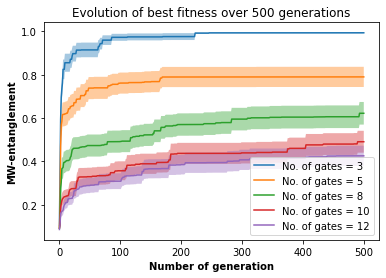

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# define the list of file names to read data from
file_names = ['Mutation_0.05_3gates5Q.txt','Mutation_0.05_5gates5Q.txt', 'Mutation_0.05_8gates5Q.txt','Mutation_0.05_10gates5Q.txt', 'Mutation_0.05_12gates5Q.txt']# 'Mutation_0.05_3gates.txt', 'Mutation_0.10_3gates.txt']

# create empty lists to store the data from each file
mean_best_fitness_list = []
std_best_fitness_list = []
standard_error_best_fitness_list = []

# loop through each file and read the data
for file_name in file_names:
    data = np.loadtxt(file_name, delimiter=',', skiprows=1)
    mean_best_fitness_list.append(data[:,3])
    std_best_fitness_list.append(data[:,4])
    standard_error_best_fitness_list.append(data[:,5])

# define the list of labels
#labels = ['Mutation prob. 0.03', 'Mutation prob. 0.05','Mutation prob. 0.15']#, 'Mutation prob. 0.05', 'Mutation prob. 0.10']
labels = ['No. of gates = 3','No. of gates = 5', 'No. of gates = 8','No. of gates = 10', 'No. of gates = 12']
# plot the best fitness with standard error for each data set
for i, mean_best_fitness in enumerate(mean_best_fitness_list):
    plt.plot(mean_best_fitness, label=labels[i])
    plt.fill_between(range(len(mean_best_fitness)), mean_best_fitness - standard_error_best_fitness_list[i], mean_best_fitness + standard_error_best_fitness_list[i], alpha=0.4)

plt.xlabel("Number of generation", fontweight='bold')
plt.ylabel("MW-entanglement", fontweight='bold')
plt.title("Evolution of best fitness over 500 generations")
plt.legend()
plt.savefig("best_fitness_5Qgates_allGates.pdf")
plt.show()


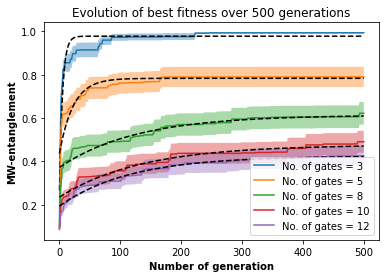

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# define the exponential function to fit to the data
def exponential(x, a, b, c):
    return a * np.exp(-b * x) + c

# define the list of file names to read data from
file_names = ['Mutation_0.05_3gates5Q.txt', 'Mutation_0.05_5gates5Q.txt', 'Mutation_0.05_8gates5Q.txt', 'Mutation_0.05_10gates5Q.txt', 'Mutation_0.05_12gates5Q.txt']

# create empty lists to store the data from each file
mean_best_fitness_list = []
std_best_fitness_list = []
standard_error_best_fitness_list = []

# loop through each file and read the data
for file_name in file_names:
    data = np.loadtxt(file_name, delimiter=',', skiprows=1)
    mean_best_fitness_list.append(data[:, 3])
    std_best_fitness_list.append(data[:, 4])
    standard_error_best_fitness_list.append(data[:, 5])

# define the list of labels
labels = ['No. of gates = 3', 'No. of gates = 5', 'No. of gates = 8', 'No. of gates = 10', 'No. of gates = 12']

# plot the mean best fitness with standard error for each data set
for i, mean_best_fitness in enumerate(mean_best_fitness_list):
    plt.plot(mean_best_fitness, label=labels[i])
    plt.fill_between(range(len(mean_best_fitness)), mean_best_fitness - standard_error_best_fitness_list[i], mean_best_fitness + standard_error_best_fitness_list[i], alpha=0.4)

    # fit an exponential curve to the mean best fitness data
    x = np.arange(len(mean_best_fitness))
    popt, pcov = curve_fit(exponential, x, mean_best_fitness, p0=[1, 0.1, 1])
    plt.plot(x, exponential(x, *popt), 'k--')

plt.xlabel("Number of generation", fontweight='bold')
plt.ylabel("MW-entanglement", fontweight='bold')
plt.title("Evolution of best fitness over 500 generations")
plt.legend()
#plt.savefig("best_fitness_5Qgates_allGates.pdf")
plt.show()


In [5]:
'''# define the list of file names to read data from
file_names = ['Mutation_0.01_3gates.txt', 'Mutation_0.03_3gates.txt', 'Mutation_0.05_3gates.txt', 'Mutation_0.10_3gates.txt']

# create empty lists to store the data from each file
mean_fitness_list = []
std_fitness_list = []
standard_error_list = []
mean_best_fitness_list = []
std_best_fitness_list = []
standard_error_best_fitness_list = []

# loop through each file and read the data
for file_name in file_names:
    data = np.loadtxt(file_name, delimiter=',', skiprows=1)
    mean_fitness_list.append(data[:,0])
    std_fitness_list.append(data[:,1])
    standard_error_list.append(data[:,2])
    mean_best_fitness_list.append(data[:,3])
    std_best_fitness_list.append(data[:,4])
    standard_error_best_fitness_list.append(data[:,5])

# plot the mean fitness with standard error for each data set
for i, mean_fitness in enumerate(mean_fitness_list):
    plt.plot(mean_fitness, label=f"Run {i+1}")
    plt.fill_between(range(len(mean_fitness)), mean_fitness - standard_error_list[i], mean_fitness + standard_error_list[i], alpha=0.4)

plt.xlabel("Number of generation", fontweight='bold')
plt.ylabel("MW-entanglement", fontweight='bold')
plt.title("Evolution of average fitness over 500 generations")
plt.legend()
#plt.savefig("average_fitness_3gates_allMutation.pdf")
plt.show()'''


'# define the list of file names to read data from\nfile_names = [\'Mutation_0.01_3gates.txt\', \'Mutation_0.03_3gates.txt\', \'Mutation_0.05_3gates.txt\', \'Mutation_0.10_3gates.txt\']\n\n# create empty lists to store the data from each file\nmean_fitness_list = []\nstd_fitness_list = []\nstandard_error_list = []\nmean_best_fitness_list = []\nstd_best_fitness_list = []\nstandard_error_best_fitness_list = []\n\n# loop through each file and read the data\nfor file_name in file_names:\n    data = np.loadtxt(file_name, delimiter=\',\', skiprows=1)\n    mean_fitness_list.append(data[:,0])\n    std_fitness_list.append(data[:,1])\n    standard_error_list.append(data[:,2])\n    mean_best_fitness_list.append(data[:,3])\n    std_best_fitness_list.append(data[:,4])\n    standard_error_best_fitness_list.append(data[:,5])\n\n# plot the mean fitness with standard error for each data set\nfor i, mean_fitness in enumerate(mean_fitness_list):\n    plt.plot(mean_fitness, label=f"Run {i+1}")\n    plt.fi

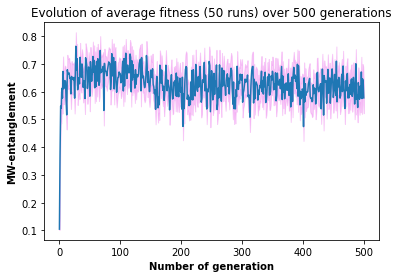

In [6]:
file_name = ['Mutation_0.05_3gates5Q.txt']

# plot the mean fitness with standard error
plt.plot(mean_fitness)
plt.fill_between(range(len(mean_fitness)), mean_fitness - standard_error, mean_fitness + standard_error, alpha=0.4, color='violet')

plt.xlabel("Number of generation", fontweight='bold')
plt.ylabel("MW-entanglement", fontweight='bold')
plt.title("Evolution of average fitness ({} runs) over 500 generations".format(number_of_runs))
#plt.savefig("plot_3gates_1Pmutation_Without_best_fit.pdf")
plt.show()

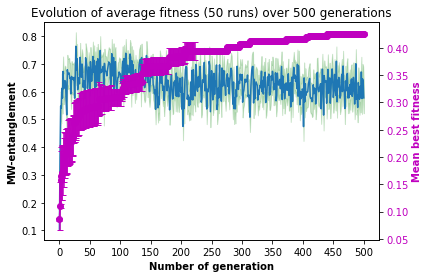

In [7]:
# create a figure with two y-axes
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# plot the mean fitness with standard error on the left y-axis
ax1.plot(mean_fitness)
ax1.fill_between(range(len(mean_fitness)), mean_fitness - standard_error, mean_fitness + standard_error, alpha=0.2, color='green')
ax1.set_xlabel("Number of generation", fontweight='bold')
ax1.set_ylabel("MW-entanglement", fontweight='bold')
ax1.set_title("Evolution of average fitness ({} runs) over 500 generations".format(number_of_runs))

# plot the mean best fitness with standard error on the right y-axis
ax2.errorbar(np.arange(len(mean_best_fitness)), mean_best_fitness, yerr=standard_error_best_fitness, fmt='o-',capsize=3,color='m')#, yerr=standard_error_best_fitness, fmt='o-', capsize=3, color='r')
ax2.set_ylabel('Mean best fitness', color='m',fontweight='bold')
ax2.tick_params(axis='y', labelcolor='m')

# set the x-ticks to show index values
ax1.set_xticks(np.arange(0, len(mean_fitness), 50))
ax1.set_xticklabels(np.arange(0, len(mean_fitness), 50))

# show the plot
#plt.savefig("plot_3gates_10Pmutation_with_error.pdf")
plt.show()


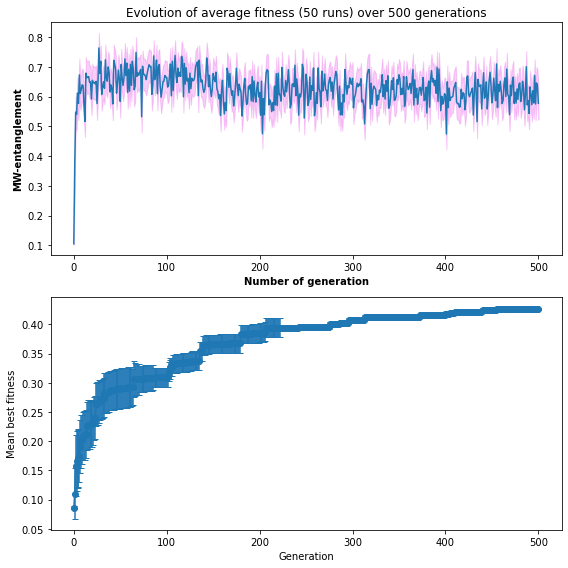

In [8]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))

# plot the mean fitness with standard error
ax1.plot(mean_fitness)
ax1.fill_between(range(len(mean_fitness)), mean_fitness - standard_error, mean_fitness + standard_error, alpha=0.4, color='violet')
ax1.set_xlabel("Number of generation", fontweight='bold')
ax1.set_ylabel("MW-entanglement", fontweight='bold')
ax1.set_title("Evolution of average fitness ({} runs) over 500 generations".format(number_of_runs))

# plot the mean best fitness with standard error
ax2.errorbar(np.arange(len(mean_best_fitness)), mean_best_fitness, yerr=standard_error_best_fitness, fmt='o-', capsize=3)
ax2.set_xlabel('Generation')
ax2.set_ylabel('Mean best fitness')

plt.tight_layout()
plt.show()


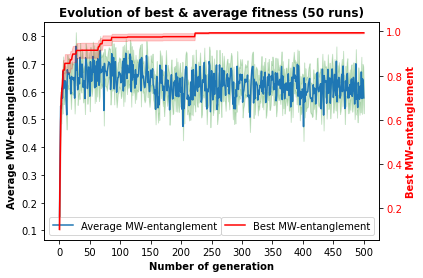

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# read the data from file
data = np.loadtxt('Mutation_0.05_3gates5Q.txt', delimiter=',')
# create a figure with two y-axes
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# extract the mean fitness, standard deviation, mean best fitness, and standard deviation of best fitness from the data
mean_fitness = data[:, 0]
std_fitness = data[:, 1]
mean_best_fitness = data[:, 3]
std_best_fitness = data[:, 4]

# calculate the standard error of the mean fitness and mean best fitness
number_of_runs = len(data)
standard_error = std_fitness / np.sqrt(50)
standard_error_best_fitness = std_best_fitness / np.sqrt(50)

# plot the mean fitness with standard error on the left y-axis
ax1.plot(mean_fitness, label='Average MW-entanglement')
ax1.fill_between(range(len(mean_fitness)), mean_fitness - standard_error, mean_fitness + standard_error, alpha=0.2, color='green')

# plot the shadow plot for mean best fitness with standard error on the right y-axis
ax2.fill_between(np.arange(len(mean_best_fitness)), mean_best_fitness - standard_error_best_fitness, mean_best_fitness + standard_error_best_fitness, alpha=0.2, color='r')
ax2.plot(mean_best_fitness, label='Best MW-entanglement', color='r')

# set the labels and title
ax1.set_xlabel("Number of generation", fontweight='bold')
ax1.set_ylabel("Average MW-entanglement", fontweight='bold')
ax1.set_title("Evolution of best & average fitness (50 runs)".format(number_of_runs),fontweight='bold')
ax2.set_ylabel('Best MW-entanglement', color='r', fontweight='bold')
ax2.tick_params(axis='y', labelcolor='r')
# set the x-ticks to show index values
ax1.set_xticks(np.arange(0, len(mean_fitness), 50))
ax1.set_xticklabels(np.arange(0, len(mean_fitness), 50))

# add legend
ax1.legend(loc='lower left')
ax2.legend(loc='lower right')

# show the plot
plt.savefig("5Q3gates_0.05Pmutation_with_error.pdf")
plt.show()


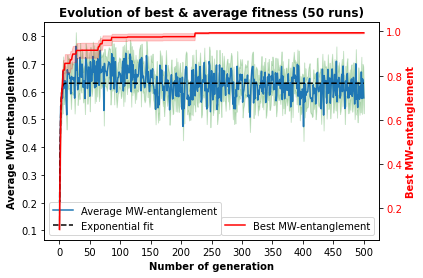

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# define the exponential function to fit to the data
def exponential(x, a, b, c):
    return a * np.exp(-b * x) + c

# read the data from file
data = np.loadtxt('Mutation_0.05_3gates5Q.txt', delimiter=',')

# create a figure with two y-axes
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# extract the mean fitness, standard deviation, mean best fitness, and standard deviation of best fitness from the data
mean_fitness = data[:, 0]
std_fitness = data[:, 1]
mean_best_fitness = data[:, 3]
std_best_fitness = data[:, 4]

# calculate the standard error of the mean fitness and mean best fitness
number_of_runs = len(data)
standard_error = std_fitness / np.sqrt(50)
standard_error_best_fitness = std_best_fitness / np.sqrt(50)

# plot the mean fitness with standard error on the left y-axis
ax1.plot(mean_fitness, label='Average MW-entanglement')
ax1.fill_between(range(len(mean_fitness)), mean_fitness - standard_error, mean_fitness + standard_error, alpha=0.2, color='green')

# fit an exponential curve to the mean fitness data
x = np.arange(len(mean_fitness))
popt, pcov = curve_fit(exponential, x, mean_fitness, p0=[1, 0.1, 1])
ax1.plot(x, exponential(x, *popt), 'k--', label='Exponential fit')

# plot the shadow plot for mean best fitness with standard error on the right y-axis
ax2.fill_between(np.arange(len(mean_best_fitness)), mean_best_fitness - standard_error_best_fitness, mean_best_fitness + standard_error_best_fitness, alpha=0.2, color='r')
ax2.plot(mean_best_fitness, label='Best MW-entanglement', color='r')

# set the labels and title
ax1.set_xlabel("Number of generation", fontweight='bold')
ax1.set_ylabel("Average MW-entanglement", fontweight='bold')
ax1.set_title("Evolution of best & average fitness (50 runs)".format(number_of_runs),fontweight='bold')
ax2.set_ylabel('Best MW-entanglement', color='r', fontweight='bold')
ax2.tick_params(axis='y', labelcolor='r')

# set the x-ticks to show index values
ax1.set_xticks(np.arange(0, len(mean_fitness), 50))
ax1.set_xticklabels(np.arange(0, len(mean_fitness), 50))

# add legend
ax1.legend(loc='lower left')
ax2.legend(loc='lower right')

# show the plot
#plt.savefig("5Q3gates_0.05Pmutation_with_error_and_exponential_fit.pdf")
plt.show()


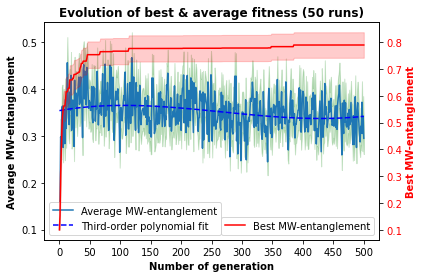

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# read the data from file
data = np.loadtxt('Mutation_0.15_5gates5Q.txt', delimiter=',')

# create a figure with two y-axes
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# extract the mean fitness, standard deviation, mean best fitness, and standard deviation of best fitness from the data
mean_fitness = data[:, 0]
std_fitness = data[:, 1]
mean_best_fitness = data[:, 3]
std_best_fitness = data[:, 4]

# calculate the standard error of the mean fitness and mean best fitness
number_of_runs = len(data)
standard_error = std_fitness / np.sqrt(50)
standard_error_best_fitness = std_best_fitness / np.sqrt(50)

# plot the mean fitness with standard error on the left y-axis
ax1.plot(mean_fitness, label='Average MW-entanglement')
ax1.fill_between(range(len(mean_fitness)), mean_fitness - standard_error, mean_fitness + standard_error, alpha=0.2, color='green')

# fit a third-order polynomial to the mean fitness data and plot the resulting curve
p_fit = np.polyfit(np.arange(len(mean_fitness)), mean_fitness, 3)
x_fit = np.linspace(0, len(mean_fitness)-1, 100)
y_fit = np.polyval(p_fit, x_fit)
ax1.plot(x_fit, y_fit, color='blue', linestyle='--', label='Third-order polynomial fit')

# plot the shadow plot for mean best fitness with standard error on the right y-axis
ax2.fill_between(np.arange(len(mean_best_fitness)), mean_best_fitness - standard_error_best_fitness, mean_best_fitness + standard_error_best_fitness, alpha=0.2, color='r')
ax2.plot(mean_best_fitness, label='Best MW-entanglement', color='r')

# set the labels and title
ax1.set_xlabel("Number of generation", fontweight='bold')
ax1.set_ylabel("Average MW-entanglement", fontweight='bold')
ax1.set_title("Evolution of best & average fitness (50 runs)".format(number_of_runs),fontweight='bold')
ax2.set_ylabel('Best MW-entanglement', color='r', fontweight='bold')
ax2.tick_params(axis='y', labelcolor='r')

# set the x-ticks to show index values
ax1.set_xticks(np.arange(0, len(mean_fitness), 50))
ax1.set_xticklabels(np.arange(0, len(mean_fitness), 50))

# add legend
ax1.legend(loc='lower left')
ax2.legend(loc='lower right')

# show the plot
plt.savefig("5Q5gates_0.15Pmutation_with_error_and_polyfit.pdf")
plt.show()
